This file analyze the control group's emotion corr and regression. 

In [4]:
import pandas as pd

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm as smgb
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
import seaborn as sns

## Participant Data

In [8]:
pre_study = pd.read_csv("../csvs/pre_study_emotion.csv")
pre_study.columns

Index(['user_id', 'user_condition', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry'],
      dtype='object')

In [9]:
print(len(pre_study))

1662


In [10]:
pre_study["user_id"].describe()

count                   1662
unique                  1662
top       iP009a45e51df9d4f5
freq                       1
Name: user_id, dtype: object

<Axes: >

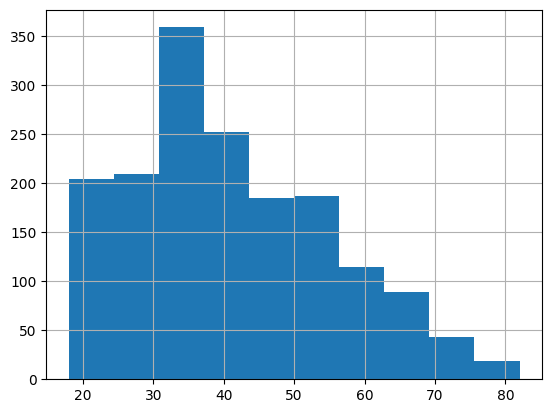

In [11]:
pre_study['age'].hist()

In [12]:
pre_study['ladder'].value_counts()

ladder
5.0     321
6.0     314
7.0     290
4.0     266
3.0     231
8.0     108
2.0      74
9.0      23
1.0      22
10.0     12
Name: count, dtype: int64

<Axes: >

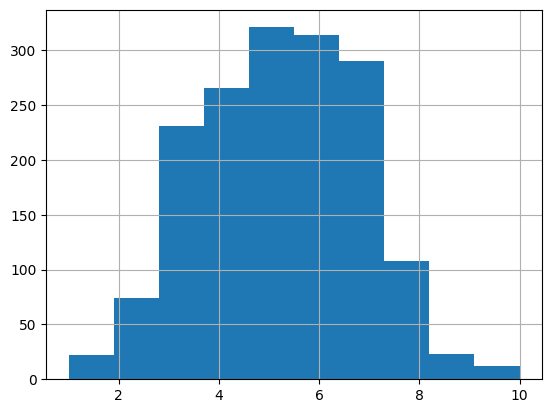

In [13]:
pre_study['ladder'].hist()

In [15]:
pre_study['gender'].value_counts()

gender
male      828
female    805
other      29
Name: count, dtype: int64

In [16]:
pre_study['binary_female'] = 0
pre_study.binary_female[pre_study.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_62398/2978616618.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pre_study.binary_female[pre_study.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipyker

In [17]:
pre_study['binary_female'].value_counts()

binary_female
0    857
1    805
Name: count, dtype: int64

<Axes: >

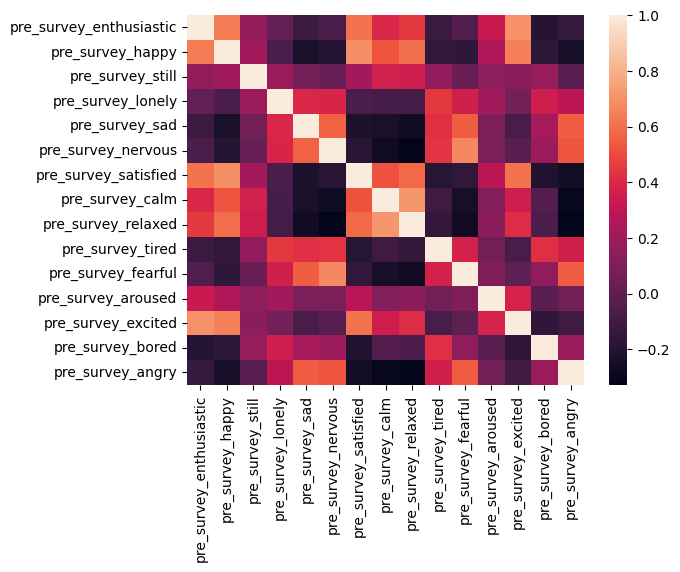

In [20]:
prestudy_corr = pre_study[[
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(prestudy_corr,2)
sns.heatmap(prestudy_corr)
# print out the number on the heatmap too

## 1HourAverage

### Merge the Pre-survey to 1HourAverage

In [21]:
pre_study.columns

Index(['user_id', 'user_condition', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry',
       'binary_female'],
      dtype='object')

In [22]:
pre_study.head()

,user_id,user_condition,gender,age,ladder,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,...,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry,binary_female
0,iP009a45e51df9d4f5,R_T,male,41,9.0,1,4,1,2,1,...,4,2,4,3,3,1,4,1,2,0
1,iP00d70f7a8a9e689f,R_C,male,24,4.0,2,5,3,3,4,...,2,4,4,1,5,3,4,4,5,0
2,iP0101580a98ac0395,I_C,male,34,4.0,1,2,4,3,2,...,4,2,4,2,3,4,2,1,1,0
3,iP011d4828b4e4458b,R_T,female,34,2.0,2,2,2,1,3,...,3,2,3,3,1,1,1,2,3,1
4,iP0122f70ccf3ebf7d,I_C,female,51,4.0,4,4,2,1,2,...,3,4,4,2,1,2,3,2,2,1


In [23]:
print(len(pre_study))

1662


In [24]:
pre_study["user_id"].describe()

count                   1662
unique                  1662
top       iP009a45e51df9d4f5
freq                       1
Name: user_id, dtype: object

In [26]:
hourAverage = pd.read_csv("../csvs/aggregation_data/1hourAverage.csv")
hourAverage.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourAverage', 'predicted_sad_1hourAverage',
       'predicted_happy_1hourAverage', 'predicted_calm_1hourAverage',
       'predicted_excited_1hourAverage', 'predicted_aroused_1hourAverage',
       'predicted_angry_1hourAverage', 'predicted_relaxed_1hourAverage',
       'predicted_fearful_1hourAverage', 'predicted_enthusiastic_1hourAverage',
       'predicted_still_1hourAverage', 'predicted_satisfied_1hourAverage',
       'predicted_bored_1hourAverage', 'predicted_lonely_1hourAverage'],
      dtype='object')

In [27]:
hourAverage.head()

,question_id,user_id,time,tweet_id,tab_id,user_condition,angry,calm,excited,sad,...,predicted_excited_1hourAverage,predicted_aroused_1hourAverage,predicted_angry_1hourAverage,predicted_relaxed_1hourAverage,predicted_fearful_1hourAverage,predicted_enthusiastic_1hourAverage,predicted_still_1hourAverage,predicted_satisfied_1hourAverage,predicted_bored_1hourAverage,predicted_lonely_1hourAverage
0,5f3b6ebd9a7040a38513726b70657033,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:08:13.164,1810281303217967397,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,NaN,NaN,0.0,0.0,...,2.000000,1.500000,3.250000,1.000000,1.500000,1.750000,1.000000,1.250000,1.000000,1.000000
1,c438a99d6afd419dbdf3e0721fb99eb3,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:10:40.822,1810419787660513353,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,NaN,NaN,0.0,0.0,...,2.400000,2.100000,3.300000,1.200000,2.200000,2.300000,1.100000,1.300000,1.000000,1.000000
2,afe3b1e4a9bf4050b14ced074dbe9b75,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:20:07.275,1810039913515008329,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,4.0,98.0,NaN,NaN,...,2.633333,2.200000,3.066667,1.133333,1.966667,2.500000,1.033333,1.333333,1.066667,1.000000
3,bdecbe16b4464dc9930fa6dfb41c6927,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:30:53.346,1810296420056121348,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,NaN,95.0,NaN,0.0,...,2.651163,2.302326,2.953488,1.116279,2.069767,2.465116,1.023256,1.372093,1.046512,1.046512
4,deb7b6a4018a4c43a182bc641ec00e83,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 23:01:13.242,1810482606376386645,d3a97236-40c4-4184-81b0-539c4b0adfab,R_T,NaN,97.0,NaN,0.0,...,2.944444,2.361111,2.416667,1.277778,1.638889,2.777778,1.083333,1.583333,1.055556,1.000000


In [30]:
# take only rows with user_condition == 'I_C'
hourAverage = hourAverage[hourAverage['user_condition'] == 'I_C']

In [31]:
print(len(hourAverage))

3934


In [32]:
print(len(hourAverage['user_id'].unique()))

265


In [33]:
merged_hourAverage = pd.merge(hourAverage, pre_study, on=['user_id'], how='inner')
print(len(merged_hourAverage))

3934


In [34]:
merged_hourAverage.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourAverage', 'predicted_sad_1hourAverage',
       'predicted_happy_1hourAverage', 'predicted_calm_1hourAverage',
       'predicted_excited_1hourAverage', 'predicted_aroused_1hourAverage',
       'predicted_angry_1hourAverage', 'predicted_relaxed_1hourAverage',
       'predicted_fearful_1hourAverage', 'predicted_enthusiastic_1hourAverage',
       'predicted_still_1hourAverage', 'predicted_satisfied_1hourAverage',
       'predicted_bored_1hourAverage', 'predicted_lonely_1hourAverage',
       'user_condition_y', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_e

In [35]:
merged_hourAverage.describe()

,tweet_id,angry,calm,excited,sad,predicted_nervous_1hourAverage,predicted_sad_1hourAverage,predicted_happy_1hourAverage,predicted_calm_1hourAverage,predicted_excited_1hourAverage,...,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry,binary_female
count,3.934000e+03,2000.000000,1978.000000,1926.000000,1900.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,...,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000
mean,1.816739e+18,17.951000,61.104146,32.349948,18.937368,1.493344,1.447625,2.821331,1.213631,3.157404,...,2.679969,3.125064,3.099390,2.260803,1.973310,1.856126,2.499492,2.206151,2.358668,0.409253
std,5.439176e+15,22.488763,26.992557,29.068215,22.327491,0.374502,0.390579,0.759004,0.223745,0.523203,...,1.142535,1.039332,1.066817,1.117825,1.062764,0.969477,1.011691,1.019740,1.063568,0.491758
min,1.562147e+18,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.814407e+18,2.000000,46.000000,7.000000,2.000000,1.250000,1.200000,2.333333,1.066667,2.866912,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,1.816306e+18,7.000000,63.500000,25.000000,9.000000,1.434783,1.400000,2.833333,1.172414,3.161290,...,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,1.819037e+18,25.000000,79.000000,50.000000,26.000000,1.654612,1.591818,3.309919,1.281162,3.459865,...,4.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,1.000000
max,1.826981e+18,100.000000,100.000000,100.000000,100.000000,4.000000,5.000000,5.000000,3.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000


#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [36]:
merged_hourAverage[['predicted_sad_1hourAverage','pre_survey_sad', 'sad']].corr()

,predicted_sad_1hourAverage,pre_survey_sad,sad
predicted_sad_1hourAverage,1.000000,-0.001999,0.090833
pre_survey_sad,-0.001999,1.000000,0.304159
sad,0.090833,0.304159,1.000000


In [37]:
merged_hourAverage[['predicted_angry_1hourAverage','pre_survey_angry', 'angry']].corr()

,predicted_angry_1hourAverage,pre_survey_angry,angry
predicted_angry_1hourAverage,1.000000,0.084610,0.185064
pre_survey_angry,0.084610,1.000000,0.385269
angry,0.185064,0.385269,1.000000


In [38]:
merged_hourAverage[['predicted_calm_1hourAverage','pre_survey_calm', 'calm']].corr()

,predicted_calm_1hourAverage,pre_survey_calm,calm
predicted_calm_1hourAverage,1.000000,-0.045856,0.008649
pre_survey_calm,-0.045856,1.000000,0.311121
calm,0.008649,0.311121,1.000000


In [39]:
merged_hourAverage[['predicted_excited_1hourAverage','pre_survey_excited', 'excited']].corr()

,predicted_excited_1hourAverage,pre_survey_excited,excited
predicted_excited_1hourAverage,1.000000,0.055150,0.114311
pre_survey_excited,0.055150,1.000000,0.430056
excited,0.114311,0.430056,1.000000


### Regression

<Axes: >

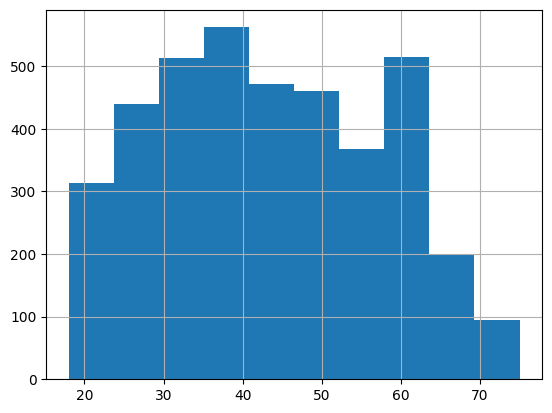

In [40]:
merged_hourAverage['age'].hist()

In [41]:
merged_hourAverage['ladder'].value_counts()

ladder
5.0     925
6.0     721
3.0     600
7.0     598
4.0     572
8.0     210
2.0     205
1.0      89
10.0     14
Name: count, dtype: int64

<Axes: >

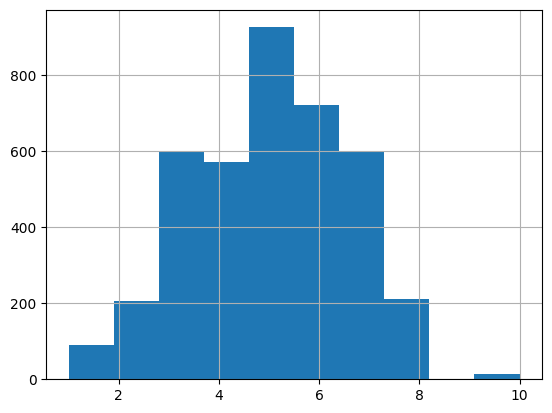

In [42]:
merged_hourAverage['ladder'].hist()

In [43]:
merged_hourAverage['gender'].value_counts()

gender
male      2185
female    1610
other      139
Name: count, dtype: int64

In [44]:
merged_hourAverage['binary_female'] = 0
merged_hourAverage.binary_female[merged_hourAverage.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_62398/4267222069.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_hourAverage.binary_female[merged_hourAverage.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55t

In [45]:
merged_hourAverage['binary_female'].value_counts()

binary_female
0    2324
1    1610
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [46]:
merged_hourAverage[['predicted_angry_1hourAverage','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1hourAverage,pre_survey_angry,angry,age,binary_female
predicted_angry_1hourAverage,1.000000,0.084610,0.185064,0.170330,-0.157293
pre_survey_angry,0.084610,1.000000,0.385269,-0.089008,-0.068767
angry,0.185064,0.385269,1.000000,0.006818,-0.103654
age,0.170330,-0.089008,0.006818,1.000000,0.033562
binary_female,-0.157293,-0.068767,-0.103654,0.033562,1.000000


array([[<Axes: title={'center': 'predicted_angry_1hourAverage'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

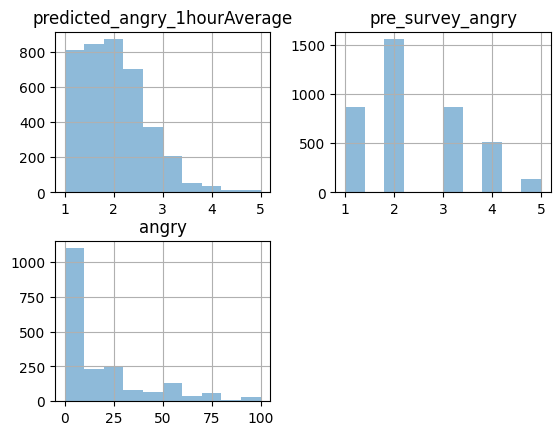

In [47]:
merged_hourAverage[['predicted_angry_1hourAverage','pre_survey_angry', 'angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'predicted_excited_1hourAverage'}>,
        <Axes: title={'center': 'pre_survey_excited'}>],
       [<Axes: title={'center': 'excited'}>, <Axes: >]], dtype=object)

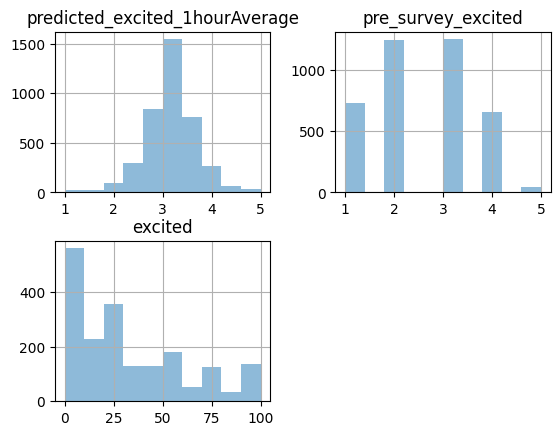

In [48]:
merged_hourAverage[['predicted_excited_1hourAverage', 'pre_survey_excited', 'excited']].hist(alpha=0.5)

In [49]:
angry_corr = merged_hourAverage[['pre_survey_angry',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
]].corr()
round(angry_corr,2)

,pre_survey_angry,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored
pre_survey_angry,1.00,-0.26,-0.46,0.00,0.32,0.61,0.55,-0.40,-0.50,-0.55,0.49,0.66,0.18,-0.14,0.21
pre_survey_enthusiastic,-0.26,1.00,0.59,-0.00,-0.05,-0.21,-0.13,0.57,0.37,0.51,-0.21,-0.14,0.23,0.66,-0.30
pre_survey_happy,-0.46,0.59,1.00,0.10,-0.20,-0.40,-0.31,0.63,0.60,0.69,-0.30,-0.38,0.05,0.54,-0.24
pre_survey_still,0.00,-0.00,0.10,1.00,0.21,0.02,-0.08,0.13,0.31,0.31,0.04,-0.01,0.08,0.13,0.03
pre_survey_lonely,0.32,-0.05,-0.20,0.21,1.00,0.44,0.42,-0.10,-0.13,-0.16,0.50,0.39,0.29,0.16,0.32
pre_survey_sad,0.61,-0.21,-0.40,0.02,0.44,1.00,0.66,-0.33,-0.41,-0.43,0.51,0.65,0.16,-0.14,0.31
pre_survey_nervous,0.55,-0.13,-0.31,-0.08,0.42,0.66,1.00,-0.23,-0.41,-0.39,0.59,0.79,0.15,-0.06,0.13
pre_survey_satisfied,-0.40,0.57,0.63,0.13,-0.10,-0.33,-0.23,1.00,0.49,0.61,-0.33,-0.33,0.06,0.59,-0.25
pre_survey_calm,-0.50,0.37,0.60,0.31,-0.13,-0.41,-0.41,0.49,1.00,0.78,-0.28,-0.47,-0.07,0.25,-0.09
pre_survey_relaxed,-0.55,0.51,0.69,0.31,-0.16,-0.43,-0.39,0.61,0.78,1.00,-0.30,-0.45,-0.01,0.39,-0.18


calculate the collapsed pre-study categories

In [54]:
pre_study.head()

,user_id,user_condition,gender,age,ladder,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,...,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry,binary_female
0,iP009a45e51df9d4f5,R_T,male,41,9.0,1,4,1,2,1,...,4,2,4,3,3,1,4,1,2,0
1,iP00d70f7a8a9e689f,R_C,male,24,4.0,2,5,3,3,4,...,2,4,4,1,5,3,4,4,5,0
2,iP0101580a98ac0395,I_C,male,34,4.0,1,2,4,3,2,...,4,2,4,2,3,4,2,1,1,0
3,iP011d4828b4e4458b,R_T,female,34,2.0,2,2,2,1,3,...,3,2,3,3,1,1,1,2,3,1
4,iP0122f70ccf3ebf7d,I_C,female,51,4.0,4,4,2,1,2,...,3,4,4,2,1,2,3,2,2,1


In [55]:
df = pre_study

In [52]:
emotion_mapping = {
    "pre_survey_HAP": ["pre_survey_excited", "pre_survey_enthusiastic", "pre_survey_happy"],
    "pre_survey_HAN": ["pre_survey_angry", "pre_survey_fearful", "pre_survey_nervous"],
    "pre_survey_LAP": ["pre_survey_calm", "pre_survey_relaxed", "pre_survey_satisfied"],
    "pre_survey_LAN": ["pre_survey_sad", "pre_survey_bored", "pre_survey_lonely", "pre_survey_tired"]
}


In [56]:
for category, emotions in emotion_mapping.items():
    df[category] = df[emotions].mean(axis=1)

df.head()

,user_id,user_condition,gender,age,ladder,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,...,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry,binary_female,pre_survey_HAP,pre_survey_HAN,pre_survey_LAP,pre_survey_LAN
0,iP009a45e51df9d4f5,R_T,male,41,9.0,1,4,1,2,1,...,3,1,4,1,2,0,3.000000,2.333333,3.333333,1.75
1,iP00d70f7a8a9e689f,R_C,male,24,4.0,2,5,3,3,4,...,5,3,4,4,5,0,3.666667,4.333333,3.333333,3.00
2,iP0101580a98ac0395,I_C,male,34,4.0,1,2,4,3,2,...,3,4,2,1,1,0,1.666667,1.666667,3.333333,2.00
3,iP011d4828b4e4458b,R_T,female,34,2.0,2,2,2,1,3,...,1,1,1,2,3,1,1.666667,2.333333,2.666667,2.25
4,iP0122f70ccf3ebf7d,I_C,female,51,4.0,4,4,2,1,2,...,1,2,3,2,2,1,3.666667,1.333333,3.666667,1.75


In [57]:
df_corr = df[["pre_survey_HAP", "pre_survey_HAN", "pre_survey_LAP", "pre_survey_LAN"]].corr()
round(df_corr,2)

,pre_survey_HAP,pre_survey_HAN,pre_survey_LAP,pre_survey_LAN
pre_survey_HAP,1.00,-0.14,0.68,-0.17
pre_survey_HAN,-0.14,1.00,-0.36,0.58
pre_survey_LAP,0.68,-0.36,1.00,-0.23
pre_survey_LAN,-0.17,0.58,-0.23,1.00


<Axes: >

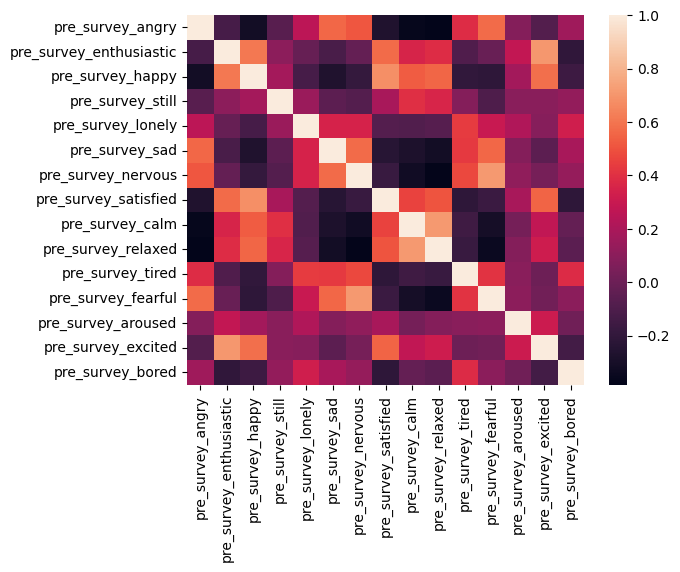

In [45]:
sns.heatmap(angry_corr)

Make z score

In [58]:
merged_hourAverage['var_age'] = (merged_hourAverage['age'] - merged_hourAverage['age'].mean()) / merged_hourAverage['age'].std()
merged_hourAverage['var_age'].describe()

count    3.934000e+03
mean    -2.022897e-16
std      1.000000e+00
min     -1.819565e+00
25%     -8.133059e-01
50%     -9.454921e-02
75%      8.398345e-01
max      2.277348e+00
Name: var_age, dtype: float64

In [59]:
# shift ladder to have a mean 0
merged_hourAverage['var_ladder'] = (merged_hourAverage['ladder'] - merged_hourAverage['ladder'].mean())
merged_hourAverage['var_ladder'].describe()

count    3.934000e+03
mean    -3.756810e-16
std      1.716639e+00
min     -3.967972e+00
25%     -9.679715e-01
50%      3.202847e-02
75%      1.032028e+00
max      5.032028e+00
Name: var_ladder, dtype: float64

In [60]:
merged_hourAverage['var_pre_survey_angry'] = (merged_hourAverage['pre_survey_angry'] - merged_hourAverage['pre_survey_angry'].mean()) / merged_hourAverage['pre_survey_angry'].std()
merged_hourAverage['var_pre_survey_sad'] = (merged_hourAverage['pre_survey_sad'] - merged_hourAverage['pre_survey_sad'].mean()) / merged_hourAverage['pre_survey_sad'].std()
merged_hourAverage['var_pre_survey_excited'] = (merged_hourAverage['pre_survey_excited'] - merged_hourAverage['pre_survey_excited'].mean()) / merged_hourAverage['pre_survey_excited'].std()
merged_hourAverage['var_pre_survey_calm'] = (merged_hourAverage['pre_survey_calm'] - merged_hourAverage['pre_survey_calm'].mean()) / merged_hourAverage['pre_survey_calm'].std()


Actual Regression

In [61]:
merged_hourAverage[['predicted_excited_1hourAverage','pre_survey_excited', 'pre_survey_angry', 'excited']].corr()

,predicted_excited_1hourAverage,pre_survey_excited,pre_survey_angry,excited
predicted_excited_1hourAverage,1.000000,0.055150,-0.074291,0.114311
pre_survey_excited,0.055150,1.000000,-0.141019,0.430056
pre_survey_angry,-0.074291,-0.141019,1.000000,-0.204103
excited,0.114311,0.430056,-0.204103,1.000000


In [62]:
merged_hourAverage[['predicted_excited_1hourAverage','pre_survey_excited', 'pre_survey_angry', 'excited']].corr()

,predicted_excited_1hourAverage,pre_survey_excited,pre_survey_angry,excited
predicted_excited_1hourAverage,1.000000,0.055150,-0.074291,0.114311
pre_survey_excited,0.055150,1.000000,-0.141019,0.430056
pre_survey_angry,-0.074291,-0.141019,1.000000,-0.204103
excited,0.114311,0.430056,-0.204103,1.000000


In [64]:
md = smf.mixedlm("angry ~ var_age + binary_female + var_ladder + var_pre_survey_angry + predicted_angry_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      angry     
No. Observations:       2000         Method:                  REML      
No. Groups:             249          Scale:                   287.9831  
Min. group size:        1            Log-Likelihood:          -8678.6697
Max. group size:        42           Converged:               Yes       
Mean group size:        8.0                                             
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     13.074    1.951  6.701 0.000  9.250 16.898
var_age                        0.548    0.943  0.581 0.561 -1.301  2.397
binary_female                 -1.296    1.899 -0.682 0.495 -5.018  2.426
var_ladder                     0.568    0.567  1.003 0.316 -0.542  1.

In [65]:
md = smf.mixedlm("excited ~ var_age + binary_female + var_ladder + var_pre_survey_excited + predicted_excited_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

                   Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       excited   
No. Observations:        1926          Method:                   REML      
No. Groups:              252           Scale:                    272.2295  
Min. group size:         1             Log-Likelihood:           -8396.3804
Max. group size:         41            Converged:                Yes       
Mean group size:         7.6                                               
---------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------------------------
Intercept                       26.947    3.416  7.888 0.000  20.251 33.643
var_age                          0.656    1.344  0.488 0.626  -1.979  3.291
binary_female                   -5.356    2.704 -1.981 0.048 -10.656 -0.057
var_ladder                     

In [66]:
merged_hourAverage[['var_pre_survey_sad', 'var_pre_survey_angry', 'var_pre_survey_excited', 'var_pre_survey_calm']].corr()

,var_pre_survey_sad,var_pre_survey_angry,var_pre_survey_excited,var_pre_survey_calm
var_pre_survey_sad,1.000000,0.612443,-0.144721,-0.408274
var_pre_survey_angry,0.612443,1.000000,-0.141019,-0.504760
var_pre_survey_excited,-0.144721,-0.141019,1.000000,0.254928
var_pre_survey_calm,-0.408274,-0.504760,0.254928,1.000000


In [67]:
md = smf.mixedlm("sad ~ var_age + binary_female + var_ladder + var_pre_survey_sad + predicted_sad_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     sad       
No. Observations:       1900        Method:                 REML      
No. Groups:             252         Scale:                  278.8897  
Min. group size:        1           Log-Likelihood:         -8250.8738
Max. group size:        39          Converged:              Yes       
Mean group size:        7.5                                           
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   15.846    2.076  7.631 0.000 11.776 19.916
var_age                     -1.105    1.042 -1.060 0.289 -3.148  0.939
binary_female                0.073    2.138  0.034 0.973 -4.119  4.264
var_ladder                  -1.054    0.652 -1.617 0.106 -2.331  0.223
var_pre_survey_sad     

In [68]:
md = smf.mixedlm("calm ~ var_age + binary_female + var_ladder + var_pre_survey_calm + predicted_calm_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())
print(mdf.rsquared_adj)

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      calm      
No. Observations:      1978         Method:                  REML      
No. Groups:            252          Scale:                   338.2561  
Min. group size:       1            Log-Likelihood:          -8792.8749
Max. group size:       35           Converged:               Yes       
Mean group size:       7.8                                             
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    59.718    3.087 19.348 0.000 53.669 65.768
var_age                       2.810    1.221  2.301 0.021  0.417  5.203
binary_female                -4.149    2.503 -1.657 0.097 -9.055  0.758
var_ladder                    1.622    0.744  2.181 0.029  0.164  3.079
var_pre_s

AttributeError: 'MixedLMResults' object has no attribute 'rsquared_adj'

In [108]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + var_pre_survey_excited + predicted_{emotion}_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      angry      
No. Observations:      8108         Method:                  REML       
No. Groups:            1152         Scale:                   271.8580   
Min. group size:       1            Log-Likelihood:          -35173.7472
Max. group size:       42           Converged:               Yes        
Mean group size:       7.0                                              
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     12.440    1.042 11.934 0.000 10.397 14.484
var_age                        0.755    0.506  1.493 0.135 -0.236  1.746
binary_female                 -2.569    1.017 -2.527 0.012 -4.562 -0.576
var_ladder

## 1HourMax

### Merge the Pre-survey to 1HourMax

In [50]:
pre_study = pd.read_csv("aggregation_data2/pre_study.csv")
pre_study.columns

Index(['user_id', 'user_condition', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry'],
      dtype='object')

In [69]:
print(len(pre_study))

1662


In [52]:
pre_study["user_id"].describe()

count                   1662
unique                  1662
top       iP009a45e51df9d4f5
freq                       1
Name: user_id, dtype: object

In [70]:
hourMax = pd.read_csv("../csvs/aggregation_data/1hourMax.csv")
hourMax.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourMax', 'predicted_sad_1hourMax',
       'predicted_happy_1hourMax', 'predicted_calm_1hourMax',
       'predicted_excited_1hourMax', 'predicted_aroused_1hourMax',
       'predicted_angry_1hourMax', 'predicted_relaxed_1hourMax',
       'predicted_fearful_1hourMax', 'predicted_enthusiastic_1hourMax',
       'predicted_still_1hourMax', 'predicted_satisfied_1hourMax',
       'predicted_bored_1hourMax', 'predicted_lonely_1hourMax'],
      dtype='object')

In [72]:
# select only rows with user_condition == 'I_C'
hourMax = hourMax[hourMax['user_condition'] == 'I_C']

In [73]:
print(len(hourMax))

3934


In [74]:
merged_hourMax = pd.merge(hourMax, pre_study, on=['user_id'])
print(len(merged_hourMax))

3934


In [75]:
merged_hourMax.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourMax', 'predicted_sad_1hourMax',
       'predicted_happy_1hourMax', 'predicted_calm_1hourMax',
       'predicted_excited_1hourMax', 'predicted_aroused_1hourMax',
       'predicted_angry_1hourMax', 'predicted_relaxed_1hourMax',
       'predicted_fearful_1hourMax', 'predicted_enthusiastic_1hourMax',
       'predicted_still_1hourMax', 'predicted_satisfied_1hourMax',
       'predicted_bored_1hourMax', 'predicted_lonely_1hourMax',
       'user_condition_y', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry',
       

#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [76]:
merged_hourMax[['predicted_sad_1hourMax','pre_survey_sad', 'sad']].corr()

,predicted_sad_1hourMax,pre_survey_sad,sad
predicted_sad_1hourMax,1.000000,0.068128,0.072883
pre_survey_sad,0.068128,1.000000,0.304159
sad,0.072883,0.304159,1.000000


In [77]:
merged_hourMax[['predicted_angry_1hourMax','pre_survey_angry', 'angry']].corr()

,predicted_angry_1hourMax,pre_survey_angry,angry
predicted_angry_1hourMax,1.000000,0.081272,0.103307
pre_survey_angry,0.081272,1.000000,0.385269
angry,0.103307,0.385269,1.000000


In [78]:
merged_hourMax[['predicted_calm_1hourMax','pre_survey_calm', 'calm']].corr()

,predicted_calm_1hourMax,pre_survey_calm,calm
predicted_calm_1hourMax,1.000000,-0.085615,-0.000147
pre_survey_calm,-0.085615,1.000000,0.311121
calm,-0.000147,0.311121,1.000000


In [82]:
merged_hourMax[['predicted_excited_1hourMax','pre_survey_excited', 'excited']].corr()

,predicted_excited_1hourMax,pre_survey_excited,excited
predicted_excited_1hourMax,1.000000,0.030468,-0.008741
pre_survey_excited,0.030468,1.000000,0.430056
excited,-0.008741,0.430056,1.000000


### Regression

<Axes: >

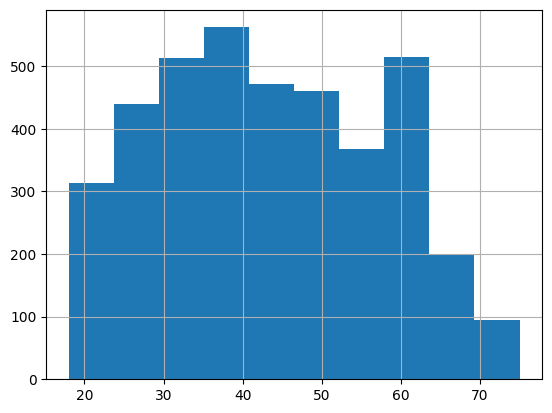

In [83]:
merged_hourMax['age'].hist()

In [84]:
merged_hourMax['gender'].value_counts()

gender
male      2185
female    1610
other      139
Name: count, dtype: int64

In [85]:
merged_hourMax['binary_female'] = 0
merged_hourMax.binary_female[merged_hourMax.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_62398/1268897729.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_hourMax.binary_female[merged_hourMax.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000g

In [86]:
merged_hourMax['binary_female'].value_counts()

binary_female
0    2324
1    1610
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [87]:
merged_hourMax[['predicted_angry_1hourMax','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1hourMax,pre_survey_angry,angry,age,binary_female
predicted_angry_1hourMax,1.000000,0.081272,0.103307,0.094268,-0.106939
pre_survey_angry,0.081272,1.000000,0.385269,-0.089008,-0.068767
angry,0.103307,0.385269,1.000000,0.006818,-0.103654
age,0.094268,-0.089008,0.006818,1.000000,0.033562
binary_female,-0.106939,-0.068767,-0.103654,0.033562,1.000000


array([[<Axes: title={'center': 'predicted_angry_1hourMax'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

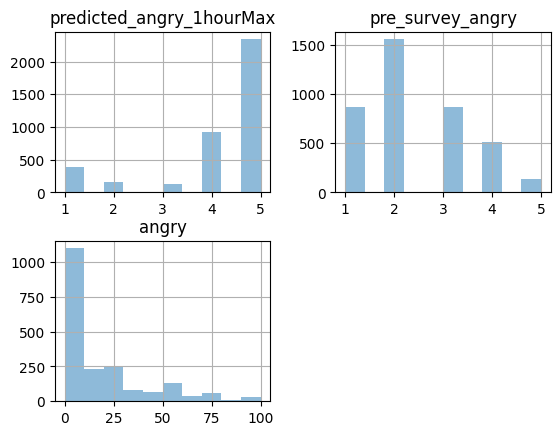

In [88]:
merged_hourMax[['predicted_angry_1hourMax','pre_survey_angry', 'angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'predicted_excited_1hourMax'}>,
        <Axes: title={'center': 'pre_survey_excited'}>],
       [<Axes: title={'center': 'excited'}>, <Axes: >]], dtype=object)

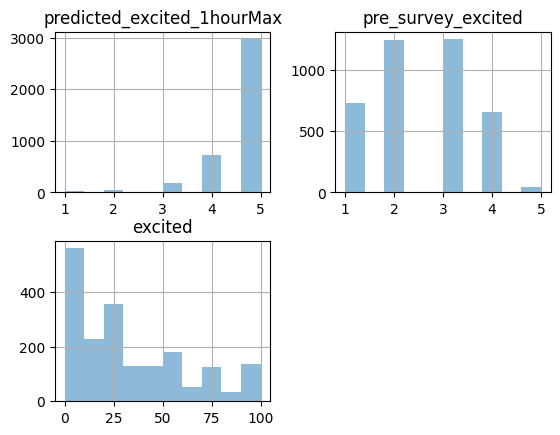

In [89]:
merged_hourMax[['predicted_excited_1hourMax', 'pre_survey_excited', 'excited']].hist(alpha=0.5)

In [90]:
angry_corr = merged_hourMax[[
# 'angry', 
# 'predicted_angry_1hourMax',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(angry_corr,2)

,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
pre_survey_enthusiastic,1.00,0.59,-0.00,-0.05,-0.21,-0.13,0.57,0.37,0.51,-0.21,-0.14,0.23,0.66,-0.30,-0.26
pre_survey_happy,0.59,1.00,0.10,-0.20,-0.40,-0.31,0.63,0.60,0.69,-0.30,-0.38,0.05,0.54,-0.24,-0.46
pre_survey_still,-0.00,0.10,1.00,0.21,0.02,-0.08,0.13,0.31,0.31,0.04,-0.01,0.08,0.13,0.03,0.00
pre_survey_lonely,-0.05,-0.20,0.21,1.00,0.44,0.42,-0.10,-0.13,-0.16,0.50,0.39,0.29,0.16,0.32,0.32
pre_survey_sad,-0.21,-0.40,0.02,0.44,1.00,0.66,-0.33,-0.41,-0.43,0.51,0.65,0.16,-0.14,0.31,0.61
pre_survey_nervous,-0.13,-0.31,-0.08,0.42,0.66,1.00,-0.23,-0.41,-0.39,0.59,0.79,0.15,-0.06,0.13,0.55
pre_survey_satisfied,0.57,0.63,0.13,-0.10,-0.33,-0.23,1.00,0.49,0.61,-0.33,-0.33,0.06,0.59,-0.25,-0.40
pre_survey_calm,0.37,0.60,0.31,-0.13,-0.41,-0.41,0.49,1.00,0.78,-0.28,-0.47,-0.07,0.25,-0.09,-0.50
pre_survey_relaxed,0.51,0.69,0.31,-0.16,-0.43,-0.39,0.61,0.78,1.00,-0.30,-0.45,-0.01,0.39,-0.18,-0.55
pre_survey_tired,-0.21,-0.30,0.04,0.50,0.51,0.59,-0.33,-0.28,-0.30,1.00,0.52,0.08,-0.08,0.37,0.49


make z score

In [91]:
merged_hourMax['var_age'] = (merged_hourMax['age'] - merged_hourMax['age'].mean()) / merged_hourMax['age'].std()
merged_hourMax['var_age'].describe()

count    3.934000e+03
mean    -2.022897e-16
std      1.000000e+00
min     -1.819565e+00
25%     -8.133059e-01
50%     -9.454921e-02
75%      8.398345e-01
max      2.277348e+00
Name: var_age, dtype: float64

In [92]:
# shift ladder to have a mean 0
merged_hourMax['var_ladder'] = (merged_hourMax['ladder'] - merged_hourMax['ladder'].mean())
merged_hourMax['var_ladder'].describe()

count    3.934000e+03
mean    -3.756810e-16
std      1.716639e+00
min     -3.967972e+00
25%     -9.679715e-01
50%      3.202847e-02
75%      1.032028e+00
max      5.032028e+00
Name: var_ladder, dtype: float64

In [93]:
merged_hourMax['var_pre_survey_angry'] = (merged_hourMax['pre_survey_angry'] - merged_hourMax['pre_survey_angry'].mean()) / merged_hourMax['pre_survey_angry'].std()
merged_hourMax['var_pre_survey_sad'] = (merged_hourMax['pre_survey_sad'] - merged_hourMax['pre_survey_sad'].mean()) / merged_hourMax['pre_survey_sad'].std()
merged_hourMax['var_pre_survey_excited'] = (merged_hourMax['pre_survey_excited'] - merged_hourMax['pre_survey_excited'].mean()) / merged_hourMax['pre_survey_excited'].std()
merged_hourMax['var_pre_survey_calm'] = (merged_hourMax['pre_survey_calm'] - merged_hourMax['pre_survey_calm'].mean()) / merged_hourMax['pre_survey_calm'].std()


Actual Regression

In [95]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + predicted_{emotion}_1hourMax", merged_hourMax, groups=merged_hourMax["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     angry     
No. Observations:     2000        Method:                 REML      
No. Groups:           249         Scale:                  288.1704  
Min. group size:      1           Log-Likelihood:         -8684.3512
Max. group size:      42          Converged:              Yes       
Mean group size:      8.0                                           
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 15.426    1.929  7.998 0.000 11.645 19.206
var_age                    0.818    0.957  0.855 0.393 -1.058  2.695
binary_female             -1.620    1.932 -0.839 0.402 -5.407  2.166
var_ladder                 0.653    0.577  1.133 0.257 -0.47

## 1HourExponential

In [96]:
hourExponential = pd.read_csv("../csvs/aggregation_data/1hourExponential.csv")
hourExponential.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourExponential', 'predicted_sad_1hourExponential',
       'predicted_happy_1hourExponential', 'predicted_calm_1hourExponential',
       'predicted_excited_1hourExponential',
       'predicted_aroused_1hourExponential',
       'predicted_angry_1hourExponential',
       'predicted_relaxed_1hourExponential',
       'predicted_fearful_1hourExponential',
       'predicted_enthusiastic_1hourExponential',
       'predicted_still_1hourExponential',
       'predicted_satisfied_1hourExponential',
       'predicted_bored_1hourExponential', 'predicted_lonely_1hourExponential',
       'predicted_tired'],
      dtype='object')

In [99]:
# slect only rows with user_condition == 'I_C'
hourExponential = hourExponential[hourExponential['user_condition'] == 'I_C']

In [100]:
print(len(hourExponential))

3934


In [101]:
merged_hourExponential = pd.merge(hourExponential, pre_study, on=['user_id'], how='inner')
print(len(merged_hourExponential))

3934


In [102]:
merged_hourExponential.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourExponential', 'predicted_sad_1hourExponential',
       'predicted_happy_1hourExponential', 'predicted_calm_1hourExponential',
       'predicted_excited_1hourExponential',
       'predicted_aroused_1hourExponential',
       'predicted_angry_1hourExponential',
       'predicted_relaxed_1hourExponential',
       'predicted_fearful_1hourExponential',
       'predicted_enthusiastic_1hourExponential',
       'predicted_still_1hourExponential',
       'predicted_satisfied_1hourExponential',
       'predicted_bored_1hourExponential', 'predicted_lonely_1hourExponential',
       'predicted_tired', 'user_condition_y', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_surve

#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [103]:
merged_hourExponential[['predicted_sad_1hourExponential','pre_survey_sad', 'sad']].corr()

,predicted_sad_1hourExponential,pre_survey_sad,sad
predicted_sad_1hourExponential,1.000000,0.002182,0.054688
pre_survey_sad,0.002182,1.000000,0.304159
sad,0.054688,0.304159,1.000000


In [104]:
merged_hourExponential[['predicted_angry_1hourExponential','pre_survey_angry', 'angry']].corr()

,predicted_angry_1hourExponential,pre_survey_angry,angry
predicted_angry_1hourExponential,1.000000,0.079770,0.156375
pre_survey_angry,0.079770,1.000000,0.385269
angry,0.156375,0.385269,1.000000


In [105]:
merged_hourExponential[['predicted_calm_1hourExponential','pre_survey_calm', 'calm']].corr()

,predicted_calm_1hourExponential,pre_survey_calm,calm
predicted_calm_1hourExponential,1.000000,-0.051664,-0.006624
pre_survey_calm,-0.051664,1.000000,0.311121
calm,-0.006624,0.311121,1.000000


In [109]:
merged_hourExponential[['predicted_excited_1hourExponential','pre_survey_excited', 'excited']].corr()

,predicted_excited_1hourExponential,pre_survey_excited,excited
predicted_excited_1hourExponential,1.000000,0.045153,0.061182
pre_survey_excited,0.045153,1.000000,0.430056
excited,0.061182,0.430056,1.000000


### Regression

In [110]:
merged_hourExponential['gender'].value_counts()

gender
male      2185
female    1610
other      139
Name: count, dtype: int64

In [111]:
merged_hourExponential['binary_female'] = 0
merged_hourExponential.binary_female[merged_hourExponential.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_62398/1863414036.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_hourExponential.binary_female[merged_hourExponential.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y

In [112]:
merged_hourExponential['binary_female'].value_counts()

binary_female
0    2324
1    1610
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [113]:
merged_hourExponential[['predicted_angry_1hourExponential','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1hourExponential,pre_survey_angry,angry,age,binary_female
predicted_angry_1hourExponential,1.000000,0.079770,0.156375,0.121699,-0.127443
pre_survey_angry,0.079770,1.000000,0.385269,-0.089008,-0.068767
angry,0.156375,0.385269,1.000000,0.006818,-0.103654
age,0.121699,-0.089008,0.006818,1.000000,0.033562
binary_female,-0.127443,-0.068767,-0.103654,0.033562,1.000000


array([[<Axes: title={'center': 'predicted_angry_1hourExponential'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

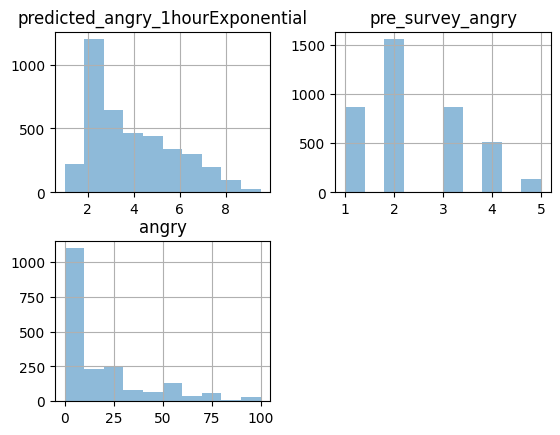

In [114]:
merged_hourExponential[['predicted_angry_1hourExponential','pre_survey_angry', 'angry']].hist(alpha=0.5)

In [115]:
angry_corr = merged_hourExponential[['angry', 
'predicted_angry_1hourExponential',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(angry_corr,2)

,angry,predicted_angry_1hourExponential,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
angry,1.00,0.16,-0.08,-0.20,0.02,0.24,0.33,0.31,-0.19,-0.22,-0.26,0.29,0.30,0.13,-0.00,0.12,0.39
predicted_angry_1hourExponential,0.16,1.00,-0.03,-0.02,0.00,-0.00,0.07,-0.01,-0.05,0.01,-0.00,0.03,0.00,0.02,-0.01,0.07,0.08
pre_survey_enthusiastic,-0.08,-0.03,1.00,0.59,-0.00,-0.05,-0.21,-0.13,0.57,0.37,0.51,-0.21,-0.14,0.23,0.66,-0.30,-0.26
pre_survey_happy,-0.20,-0.02,0.59,1.00,0.10,-0.20,-0.40,-0.31,0.63,0.60,0.69,-0.30,-0.38,0.05,0.54,-0.24,-0.46
pre_survey_still,0.02,0.00,-0.00,0.10,1.00,0.21,0.02,-0.08,0.13,0.31,0.31,0.04,-0.01,0.08,0.13,0.03,0.00
pre_survey_lonely,0.24,-0.00,-0.05,-0.20,0.21,1.00,0.44,0.42,-0.10,-0.13,-0.16,0.50,0.39,0.29,0.16,0.32,0.32
pre_survey_sad,0.33,0.07,-0.21,-0.40,0.02,0.44,1.00,0.66,-0.33,-0.41,-0.43,0.51,0.65,0.16,-0.14,0.31,0.61
pre_survey_nervous,0.31,-0.01,-0.13,-0.31,-0.08,0.42,0.66,1.00,-0.23,-0.41,-0.39,0.59,0.79,0.15,-0.06,0.13,0.55
pre_survey_satisfied,-0.19,-0.05,0.57,0.63,0.13,-0.10,-0.33,-0.23,1.00,0.49,0.61,-0.33,-0.33,0.06,0.59,-0.25,-0.40
pre_survey_calm,-0.22,0.01,0.37,0.60,0.31,-0.13,-0.41,-0.41,0.49,1.00,0.78,-0.28,-0.47,-0.07,0.25,-0.09,-0.50


make z score

In [116]:
merged_hourExponential['var_age'] = (merged_hourExponential['age'] - merged_hourExponential['age'].mean()) / merged_hourExponential['age'].std()
merged_hourExponential['var_age'].describe()

count    3.934000e+03
mean    -2.022897e-16
std      1.000000e+00
min     -1.819565e+00
25%     -8.133059e-01
50%     -9.454921e-02
75%      8.398345e-01
max      2.277348e+00
Name: var_age, dtype: float64

In [117]:
# shift ladder to have a mean 0
merged_hourExponential['var_ladder'] = (merged_hourExponential['ladder'] - merged_hourExponential['ladder'].mean())
merged_hourExponential['var_ladder'].describe()

count    3.934000e+03
mean    -3.756810e-16
std      1.716639e+00
min     -3.967972e+00
25%     -9.679715e-01
50%      3.202847e-02
75%      1.032028e+00
max      5.032028e+00
Name: var_ladder, dtype: float64

In [118]:
merged_hourExponential['var_pre_survey_angry'] = (merged_hourExponential['pre_survey_angry'] - merged_hourExponential['pre_survey_angry'].mean()) / merged_hourExponential['pre_survey_angry'].std()
merged_hourExponential['var_pre_survey_sad'] = (merged_hourExponential['pre_survey_sad'] - merged_hourExponential['pre_survey_sad'].mean()) / merged_hourExponential['pre_survey_sad'].std()
merged_hourExponential['var_pre_survey_excited'] = (merged_hourExponential['pre_survey_excited'] - merged_hourExponential['pre_survey_excited'].mean()) / merged_hourExponential['pre_survey_excited'].std()
merged_hourExponential['var_pre_survey_calm'] = (merged_hourExponential['pre_survey_calm'] - merged_hourExponential['pre_survey_calm'].mean()) / merged_hourExponential['pre_survey_calm'].std()


Actual Regression

In [120]:
import statsmodels.formula.api as smf

emotions = ['angry', 'excited', 'sad', 'calm']

# Open a text file to save the results
with open("1hourExponential_regression_results.txt", "w") as file:
    for emotion in emotions:
        file.write("-" * 30 + "\n")
        file.write("Regression Result for " + emotion + "\n")
        
        # Run the mixed linear model
        md = smf.mixedlm(
            f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + predicted_{emotion}_1hourExponential",
            merged_hourExponential,
            groups=merged_hourExponential["user_id"],
            missing='drop'
        )
        mdf = md.fit()
        
        # Write the summary to the file
        file.write(mdf.summary().as_text() + "\n")


In [153]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + var_pre_survey_excited + predicted_{emotion}_1hourExponential", merged_hourExponential, groups=merged_hourExponential["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
                   Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       angry      
No. Observations:        8108          Method:                   REML       
No. Groups:              1152          Scale:                    271.6652   
Min. group size:         1             Log-Likelihood:           -35175.4653
Max. group size:         42            Converged:                Yes        
Mean group size:         7.0                                                
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                         15.300    0.853 17.938 0.000 13.628 16.971
var_age                            0.890    0.506  1.757 0.079 -0.103  1.882
binary_female                     -2.

## 1TweetBefore

In [134]:
oneTweet = pd.read_csv("../csvs/aggregation_data/1tweetBefore.csv")
oneTweet.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1tweetBefore', 'predicted_sad_1tweetBefore',
       'predicted_happy_1tweetBefore', 'predicted_calm_1tweetBefore',
       'predicted_excited_1tweetBefore', 'predicted_aroused_1tweetBefore',
       'predicted_angry_1tweetBefore', 'predicted_relaxed_1tweetBefore',
       'predicted_fearful_1tweetBefore', 'predicted_enthusiastic_1tweetBefore',
       'predicted_still_1tweetBefore', 'predicted_satisfied_1tweetBefore',
       'predicted_bored_1tweetBefore', 'predicted_lonely_1tweetBefore',
       'predicted_tired_1tweetBefore'],
      dtype='object')

In [135]:
oneTweet.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1tweetBefore', 'predicted_sad_1tweetBefore',
       'predicted_happy_1tweetBefore', 'predicted_calm_1tweetBefore',
       'predicted_excited_1tweetBefore', 'predicted_aroused_1tweetBefore',
       'predicted_angry_1tweetBefore', 'predicted_relaxed_1tweetBefore',
       'predicted_fearful_1tweetBefore', 'predicted_enthusiastic_1tweetBefore',
       'predicted_still_1tweetBefore', 'predicted_satisfied_1tweetBefore',
       'predicted_bored_1tweetBefore', 'predicted_lonely_1tweetBefore',
       'predicted_tired_1tweetBefore'],
      dtype='object')

In [136]:
# pick rows with user_condition == 'I_C'
oneTweet = oneTweet[oneTweet['user_condition'] == 'I_C']

In [137]:
print(len(oneTweet))

3334


In [138]:
print(oneTweet.head())

                         question_id                           user_id  \
67  ecf8a5c78ade420097b46c5e1b301216  065C29BC8C3043A5A8176B9DD368CBA3   
68  feadb3b0dddb46ce868a51d9a76d20f5  065C29BC8C3043A5A8176B9DD368CBA3   
69  1e239fb1a2ee40aa8c544246c4f44be8  065C29BC8C3043A5A8176B9DD368CBA3   
70  6cb4f1d701944c82b229935ebb509173  065C29BC8C3043A5A8176B9DD368CBA3   
71  f7c2ff98506f4afdb3a75e06d5d1f9d5  065C29BC8C3043A5A8176B9DD368CBA3   

                       time             tweet_id  \
67  2024-07-30 09:36:25.636  1818104634222825896   
68  2024-07-31 08:16:27.684  1818360675263185042   
69  2024-08-01 17:18:14.022  1818770747692925237   
70  2024-08-01 17:42:28.060  1819022807642116537   
71  2024-08-02 07:47:06.076  1819066762874572912   

                                  tab_id user_condition  angry  calm  excited  \
67  410024bf-a830-4358-a214-861db86bf9cc            I_C   13.0  74.0      NaN   
68  d1ee8bb6-aa70-418a-ba1f-6745162e6e9c            I_C   48.0   NaN      2.0   

In [139]:
merged_oneTweet = pd.merge(oneTweet, pre_study, on=['user_id'], how='inner')
print(len(merged_oneTweet))

3334


In [140]:
merged_oneTweet.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1tweetBefore', 'predicted_sad_1tweetBefore',
       'predicted_happy_1tweetBefore', 'predicted_calm_1tweetBefore',
       'predicted_excited_1tweetBefore', 'predicted_aroused_1tweetBefore',
       'predicted_angry_1tweetBefore', 'predicted_relaxed_1tweetBefore',
       'predicted_fearful_1tweetBefore', 'predicted_enthusiastic_1tweetBefore',
       'predicted_still_1tweetBefore', 'predicted_satisfied_1tweetBefore',
       'predicted_bored_1tweetBefore', 'predicted_lonely_1tweetBefore',
       'predicted_tired_1tweetBefore', 'user_condition_y', 'gender', 'age',
       'ladder', 'pre_survey_enthusiastic', 'pre_survey_happy',
       'pre_survey_still', 'pre_survey_lonely', 'pre_survey_sad',
       'pre_survey_nervous', 'pre_survey_satisfied', 'pre_survey_calm',
       'pre_survey_relaxed', 'pre_survey_tired', 'pre_survey_fearful',
       'pr

#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [141]:
merged_oneTweet[['predicted_sad_1tweetBefore','pre_survey_sad', 'sad']].corr()

,predicted_sad_1tweetBefore,pre_survey_sad,sad
predicted_sad_1tweetBefore,1.000000,-0.006020,0.028684
pre_survey_sad,-0.006020,1.000000,0.307681
sad,0.028684,0.307681,1.000000


In [142]:
merged_oneTweet[['predicted_angry_1tweetBefore','pre_survey_angry', 'angry']].corr()

,predicted_angry_1tweetBefore,pre_survey_angry,angry
predicted_angry_1tweetBefore,1.000000,0.064188,0.111822
pre_survey_angry,0.064188,1.000000,0.402457
angry,0.111822,0.402457,1.000000


In [143]:
merged_oneTweet[['predicted_calm_1tweetBefore','pre_survey_calm', 'calm']].corr()

,predicted_calm_1tweetBefore,pre_survey_calm,calm
predicted_calm_1tweetBefore,1.000000,-0.010593,0.014417
pre_survey_calm,-0.010593,1.000000,0.287075
calm,0.014417,0.287075,1.000000


In [144]:
merged_oneTweet[['predicted_excited_1tweetBefore','pre_survey_excited', 'excited']].corr()

,predicted_excited_1tweetBefore,pre_survey_excited,excited
predicted_excited_1tweetBefore,1.000000,0.017270,0.048492
pre_survey_excited,0.017270,1.000000,0.460935
excited,0.048492,0.460935,1.000000


### Regression

<Axes: >

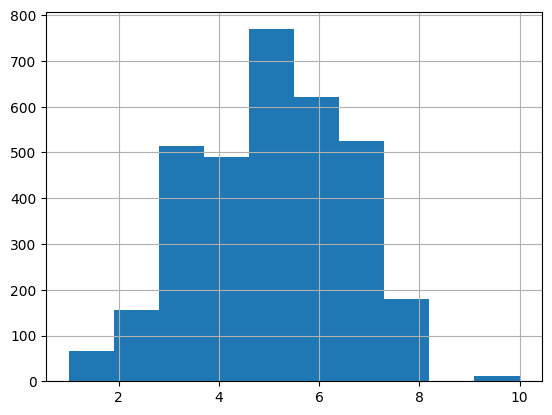

In [145]:
merged_oneTweet['ladder'].hist()

In [146]:
merged_oneTweet['gender'].value_counts()

gender
male      1869
female    1376
other       89
Name: count, dtype: int64

In [147]:
merged_oneTweet['binary_female'] = 0
merged_oneTweet.binary_female[merged_oneTweet.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_62398/2252356066.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_oneTweet.binary_female[merged_oneTweet.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl0000

In [148]:
merged_oneTweet['binary_female'].value_counts()

binary_female
0    1958
1    1376
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [149]:
merged_oneTweet[['predicted_angry_1tweetBefore','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1tweetBefore,pre_survey_angry,angry,age,binary_female
predicted_angry_1tweetBefore,1.000000,0.064188,0.111822,0.078510,-0.075993
pre_survey_angry,0.064188,1.000000,0.402457,-0.076075,-0.049144
angry,0.111822,0.402457,1.000000,-0.014193,-0.104091
age,0.078510,-0.076075,-0.014193,1.000000,0.023333
binary_female,-0.075993,-0.049144,-0.104091,0.023333,1.000000


array([[<Axes: title={'center': 'predicted_angry_1tweetBefore'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

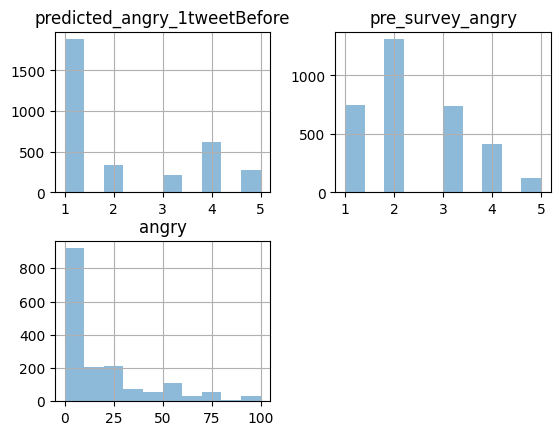

In [150]:
merged_oneTweet[['predicted_angry_1tweetBefore','pre_survey_angry', 'angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'predicted_excited_1tweetBefore'}>,
        <Axes: title={'center': 'pre_survey_excited'}>],
       [<Axes: title={'center': 'excited'}>, <Axes: >]], dtype=object)

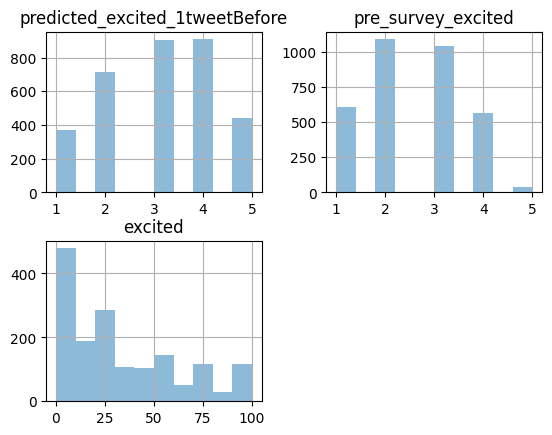

In [151]:
merged_oneTweet[['predicted_excited_1tweetBefore', 'pre_survey_excited', 'excited']].hist(alpha=0.5)

In [152]:
angry_corr = merged_oneTweet[['angry', 
'predicted_angry_1tweetBefore',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(angry_corr,2)

,angry,predicted_angry_1tweetBefore,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
angry,1.00,0.11,-0.09,-0.22,0.02,0.27,0.36,0.33,-0.21,-0.24,-0.28,0.32,0.32,0.11,-0.02,0.16,0.40
predicted_angry_1tweetBefore,0.11,1.00,-0.02,-0.02,-0.00,-0.00,0.06,-0.00,-0.05,0.01,-0.00,0.02,0.01,0.02,-0.01,0.06,0.06
pre_survey_enthusiastic,-0.09,-0.02,1.00,0.58,-0.04,-0.05,-0.20,-0.10,0.55,0.34,0.49,-0.20,-0.13,0.22,0.66,-0.30,-0.25
pre_survey_happy,-0.22,-0.02,0.58,1.00,0.09,-0.22,-0.41,-0.30,0.62,0.61,0.70,-0.30,-0.38,0.03,0.53,-0.23,-0.47
pre_survey_still,0.02,-0.00,-0.04,0.09,1.00,0.18,0.01,-0.08,0.12,0.30,0.29,0.03,-0.00,0.07,0.08,0.04,0.01
pre_survey_lonely,0.27,-0.00,-0.05,-0.22,0.18,1.00,0.44,0.45,-0.11,-0.16,-0.18,0.51,0.42,0.29,0.14,0.32,0.34
pre_survey_sad,0.36,0.06,-0.20,-0.41,0.01,0.44,1.00,0.66,-0.33,-0.42,-0.44,0.51,0.66,0.15,-0.14,0.31,0.62
pre_survey_nervous,0.33,-0.00,-0.10,-0.30,-0.08,0.45,0.66,1.00,-0.22,-0.41,-0.40,0.58,0.78,0.17,-0.04,0.12,0.55
pre_survey_satisfied,-0.21,-0.05,0.55,0.62,0.12,-0.11,-0.33,-0.22,1.00,0.49,0.61,-0.33,-0.33,0.05,0.59,-0.25,-0.40
pre_survey_calm,-0.24,0.01,0.34,0.61,0.30,-0.16,-0.42,-0.41,0.49,1.00,0.78,-0.29,-0.48,-0.09,0.24,-0.08,-0.51


Make z score

In [153]:
merged_oneTweet['var_age'] = (merged_oneTweet['age'] - merged_oneTweet['age'].mean()) / merged_oneTweet['age'].std()
merged_oneTweet['var_age'].describe()

count    3.334000e+03
mean    -1.704962e-17
std      1.000000e+00
min     -1.863690e+00
25%     -8.551032e-01
50%      9.399587e-03
75%      8.018604e-01
max      2.242698e+00
Name: var_age, dtype: float64

In [154]:
# shift ladder to have a mean 0
merged_oneTweet['var_ladder'] = (merged_oneTweet['ladder'] - merged_oneTweet['ladder'].mean())
merged_oneTweet['var_ladder'].describe()

count    3.334000e+03
mean    -3.409923e-16
std      1.700918e+00
min     -4.008098e+00
25%     -1.008098e+00
50%     -8.098380e-03
75%      9.919016e-01
max      4.991902e+00
Name: var_ladder, dtype: float64

In [155]:
merged_oneTweet['var_pre_survey_angry'] = (merged_oneTweet['pre_survey_angry'] - merged_oneTweet['pre_survey_angry'].mean()) / merged_oneTweet['pre_survey_angry'].std()
merged_oneTweet['var_pre_survey_sad'] = (merged_oneTweet['pre_survey_sad'] - merged_oneTweet['pre_survey_sad'].mean()) / merged_oneTweet['pre_survey_sad'].std()
merged_oneTweet['var_pre_survey_excited'] = (merged_oneTweet['pre_survey_excited'] - merged_oneTweet['pre_survey_excited'].mean()) / merged_oneTweet['pre_survey_excited'].std()
merged_oneTweet['var_pre_survey_calm'] = (merged_oneTweet['pre_survey_calm'] - merged_oneTweet['pre_survey_calm'].mean()) / merged_oneTweet['pre_survey_calm'].std()


Actual Regression

In [156]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + predicted_{emotion}_1tweetBefore", merged_oneTweet, groups=merged_oneTweet["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
                 Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      angry     
No. Observations:       1709         Method:                  REML      
No. Groups:             244          Scale:                   294.9544  
Min. group size:        1            Log-Likelihood:          -7452.0162
Max. group size:        39           Converged:               Yes       
Mean group size:        7.0                                             
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     18.145    1.521 11.932 0.000 15.164 21.126
var_age                        0.335    1.003  0.334 0.738 -1.631  2.302
binary_female                 -1.961    2.025 -0.968 0.333 -5.930  2.008
var_ladder